# <center>**Projeto Integrador INSPER**</center>

**<center> Contextualização </center>**

O projeto integrador de 2023 consiste em construir um pipeline completo de pré-processamento de dados e construção de modelo preditivo de classificação, voltado para predizer se uma empresa irá deixar de operar em até dois anos.
    
Os dados foram coletados e curados pela Bisnode, uma empresa europeia do ramo de business information.

São dados entre os anos de 2005 e 2016, com empresas em alguns segmentos da economia (como produtos eletrônicos, equipamentos elétricos, motores, etc.) e serviços (alimentação, bebidas e hospedagem). Empresas que possuem receita acima de 100 milhões de Euro foram remotivdas para fins de mininizar as possibilidades de identificação.

In [1]:
# Importando bibliotecas

import pandas as pd
import numpy as np
import missingno as msno
from random import choice
import matplotlib.pyplot as plt
import seaborn as sns
import random

# Ajustando configurações de display
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [2]:
# Criando df_bisnode a parir de arquivo csv
df_bisnode = pd.read_csv("cs_bisnode_panel.csv")

df_bisnode

,comp_id,begin,end,COGS,amort,curr_assets,curr_liab,extra_exp,extra_inc,extra_profit_loss,finished_prod,fixed_assets,inc_bef_tax,intang_assets,inventories,liq_assets,material_exp,net_dom_sales,net_exp_sales,personnel_exp,profit_loss_year,sales,share_eq,subscribed_cap,tang_assets,wages,D,balsheet_flag,balsheet_length,balsheet_notfullyear,year,founded_year,exit_year,ceo_count,foreign,female,birth_year,inoffice_days,gender,origin,nace_main,ind2,ind,urban_m,region_m,founded_date,exit_date,labor_avg
0,1001034.00,2005-01-01,2005-12-31,NaN,692.59,7266.67,7574.07,0.00,0.00,0.00,NaN,1229.63,218.52,0.00,4355.56,2911.11,38222.22,NaN,NaN,22222.22,62.96,62751.85,881.48,1388.89,1229.63,NaN,NaN,0,364,0,2005,1990.00,NaN,2.00,0.00,0.50,1968.00,5686.50,mix,Domestic,5630.00,56.00,3.00,1,Central,1990-11-19,NaN,NaN
1,1001034.00,2006-01-01,2006-12-31,NaN,603.70,13122.22,12211.11,0.00,0.00,0.00,NaN,725.93,996.30,0.00,7225.93,5896.30,38140.74,NaN,NaN,23844.45,755.56,64625.93,1637.04,1388.89,725.93,NaN,NaN,0,364,0,2006,1990.00,NaN,2.00,0.00,0.50,1968.00,5686.50,mix,Domestic,5630.00,56.00,3.00,1,Central,1990-11-19,NaN,NaN
2,1001034.00,2007-01-01,2007-12-31,NaN,425.93,8196.30,7800.00,0.00,0.00,0.00,NaN,1322.22,570.37,0.00,7951.85,177.78,40174.07,NaN,NaN,22262.96,0.00,65100.00,1633.33,1388.89,1322.22,NaN,NaN,0,364,0,2007,1990.00,NaN,2.00,0.00,0.50,1968.00,5686.50,mix,Domestic,5630.00,56.00,3.00,1,Central,1990-11-19,NaN,NaN
3,1001034.00,2008-01-01,2008-12-31,NaN,300.00,8485.19,7781.48,0.00,0.00,0.00,NaN,1022.22,714.81,0.00,5233.33,1392.59,54274.07,NaN,NaN,21107.41,0.00,78085.19,1725.93,1481.48,1022.22,NaN,NaN,0,365,0,2008,1990.00,NaN,2.00,0.00,0.50,1968.00,5686.50,mix,Domestic,5630.00,56.00,3.00,1,Central,1990-11-19,NaN,NaN
4,1001034.00,2009-01-01,2009-12-31,NaN,207.41,5137.04,15300.00,0.00,0.00,0.00,NaN,814.81,-11044.44,0.00,3259.26,11.11,41755.55,NaN,NaN,13237.04,-11074.07,45388.89,-9348.15,1481.48,814.81,NaN,NaN,0,364,0,2009,1990.00,NaN,2.00,0.00,0.50,1968.00,5686.50,mix,Domestic,5630.00,56.00,3.00,1,Central,1990-11-19,NaN,0.08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287824,464120938496.00,2011-01-01,2011-12-31,NaN,0.00,1807.41,3.70,0.00,0.00,0.00,NaN,0.00,25.93,0.00,0.00,1807.41,37.04,NaN,NaN,225.93,22.22,288.89,1803.70,1111.11,0.00,NaN,NaN,0,364,0,2011,1990.00,NaN,1.00,0.00,1.00,NaN,8187.00,female,Domestic,5510.00,55.00,3.00,2,East,1990-08-22,NaN,NaN
287825,464120938496.00,2012-01-01,2012-12-31,NaN,0.00,1518.52,96.30,0.00,0.00,0.00,NaN,0.00,-381.48,0.00,0.00,1518.52,96.30,NaN,NaN,285.19,-381.48,0.00,1422.22,1111.11,0.00,NaN,NaN,0,365,0,2012,1990.00,NaN,1.00,0.00,1.00,NaN,8187.00,female,Domestic,5510.00,55.00,3.00,2,East,1990-08-22,NaN,NaN
287826,464120938496.00,2013-01-01,2013-12-31,NaN,0.00,988.89,77.78,0.00,0.00,0.00,NaN,0.00,-511.11,0.00,0.00,966.67,207.41,NaN,NaN,296.30,-511.11,0.00,911.11,1111.11,0.00,NaN,NaN,0,364,0,2013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5510.00,55.00,3.00,2,East,1990-08-22,NaN,NaN
287827,464120938496.00,2014-01-01,2014-12-31,NaN,0.00,644.44,233.33,0.00,0.00,0.00,NaN,0.00,-500.00,0.00,0.00,618.52,200.00,NaN,NaN,303.70,-500.00,0.00,411.11,1111.11,0.00,NaN,NaN,0,364,0,2014,1990.00,NaN,1.00,0.00,1.00,1942.00,1441.00,female,Domestic,5510.00,55.00,3.00,2,East,1990-08-22,NaN,NaN


In [3]:
# Principais informações
df_bisnode.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287829 entries, 0 to 287828
Data columns (total 48 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   comp_id               287829 non-null  float64
 1   begin                 287829 non-null  object 
 2   end                   287829 non-null  object 
 3   COGS                  18257 non-null   float64
 4   amort                 279789 non-null  float64
 5   curr_assets           287698 non-null  float64
 6   curr_liab             287698 non-null  float64
 7   extra_exp             269300 non-null  float64
 8   extra_inc             269300 non-null  float64
 9   extra_profit_loss     270626 non-null  float64
 10  finished_prod         17485 non-null   float64
 11  fixed_assets          287698 non-null  float64
 12  inc_bef_tax           280392 non-null  float64
 13  intang_assets         287689 non-null  float64
 14  inventories           287698 non-null  float64
 15  

In [4]:
# Criando função que retorna o percentual de missing data do dataframe

def missing_data_df(df):
    """
    Função que retorna o percentual de dados faltantes de um dataframe
    """
    # Contando o numero de linhas sem dado
    missing_count = df.isnull().sum()

    # Calculando o percentual com base no numero total de linhas do dataframe
    missing_percentage = (missing_count / len(df))*100

    missing_percentage = missing_percentage.sort_values(ascending=False)

    return missing_percentage


# Executando função para o dataframe
missing_data_df(df_bisnode).head(10)

D               100.00
finished_prod    93.93
wages            93.75
COGS             93.66
net_exp_sales    93.66
net_dom_sales    93.66
exit_year        86.50
exit_date        80.48
labor_avg        50.91
birth_year       38.85
dtype: float64

In [5]:
# Retirando colunas

df_bisnode = df_bisnode.drop(columns=['COGS', 'finished_prod', 'net_dom_sales', 'net_exp_sales', 'wages', 'D'], axis=1)

# Visualizando alterações

missing_data_df(df_bisnode).head(10)

exit_year      86.50
exit_date      80.48
labor_avg      50.91
birth_year     38.85
founded_year   19.61
gender         19.60
origin         19.60
female         19.60
foreign        19.60
ceo_count      19.60
dtype: float64

<AxesSubplot: >

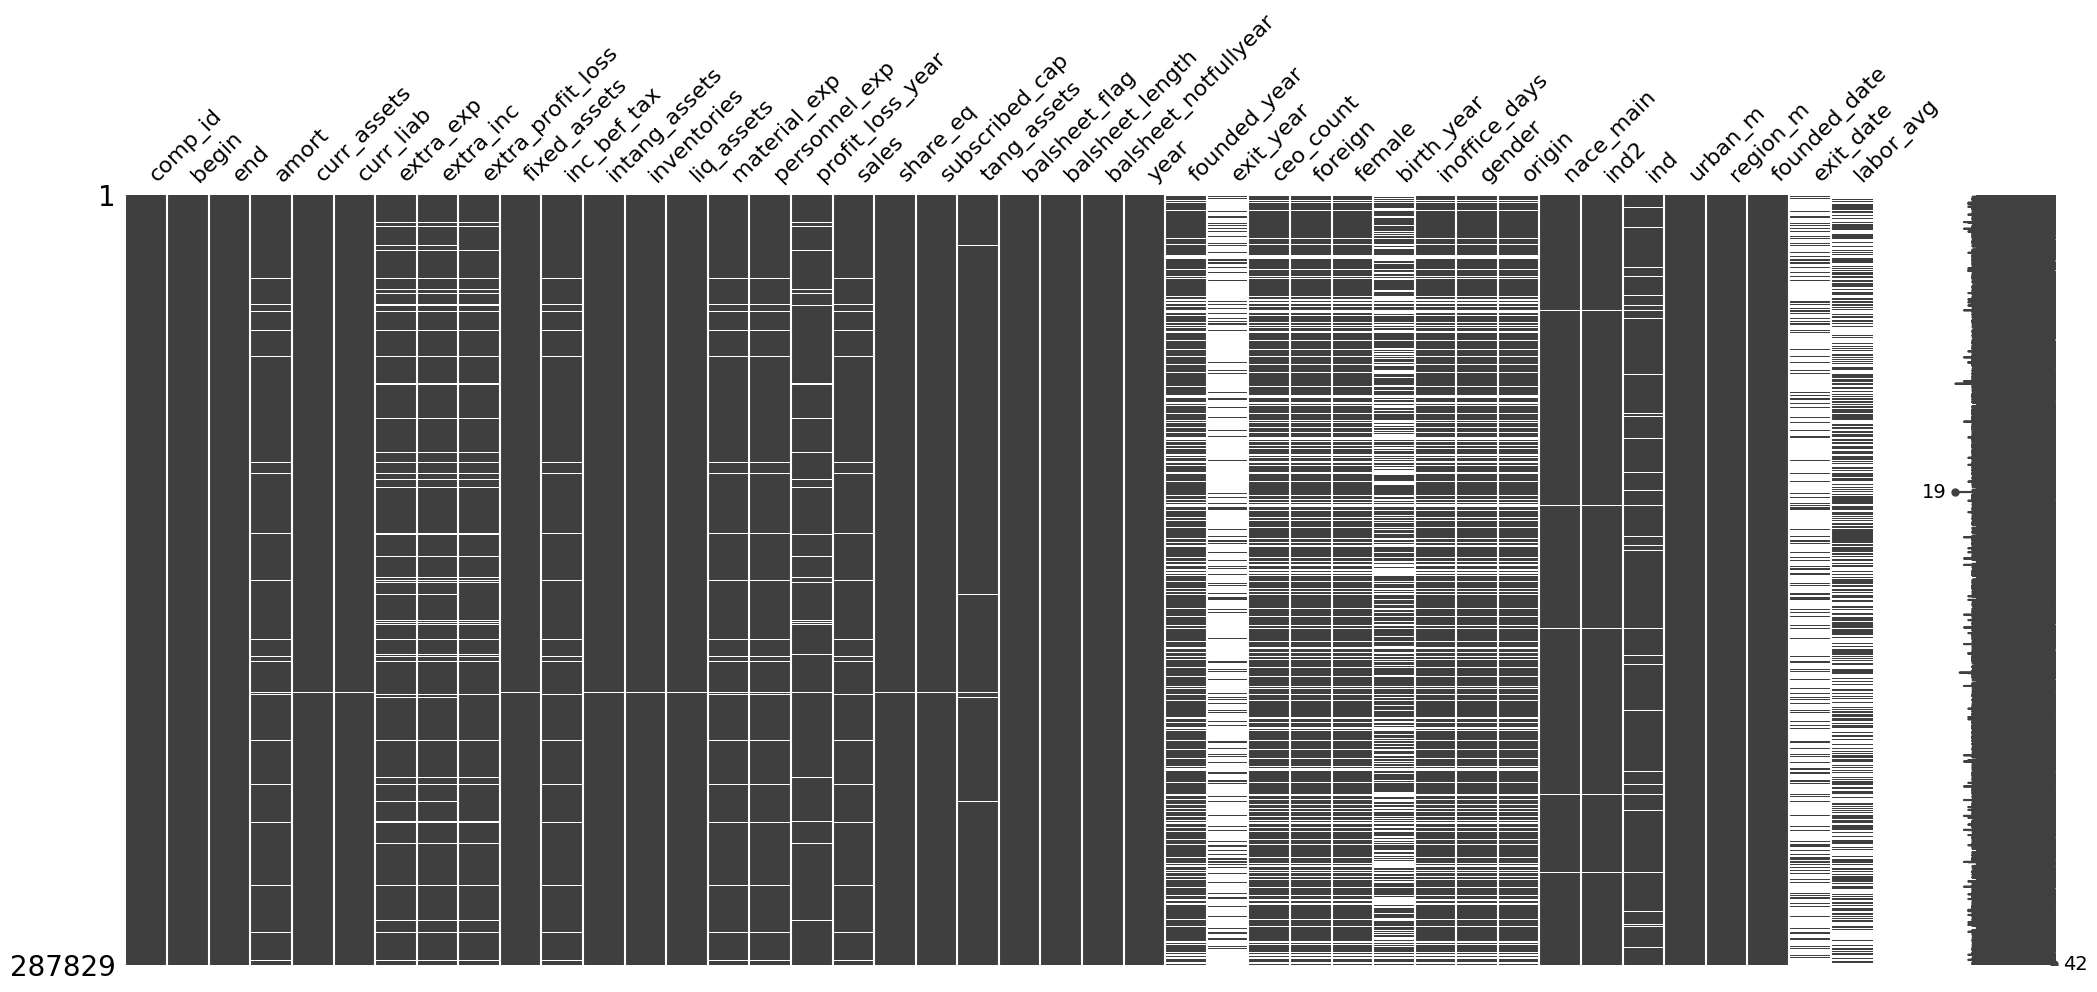

In [6]:
# Visualizando Valores Faltantes com a Biblioteca missigno

msno.matrix(df_bisnode)

In [7]:
# Removendo linhas com registro de 2016
df_bisnode = df_bisnode[df_bisnode['year'] != 2016]

In [8]:
# Verificando o numero de linhas com sales nulos
print(f"Numero de linhas com valores nulos: {df_bisnode[df_bisnode['sales'].isna()].shape[0]}")

# Realizando o tratamento
df_bisnode.loc[df_bisnode['sales'].isna(), "sales"] = 0

# Verificando mudanças:
print(f"Numero de linhas com valores nulos após tratamento: {df_bisnode[df_bisnode['sales'].isna()].shape[0]}")

Numero de linhas com valores nulos: 7437
Numero de linhas com valores nulos após tratamento: 0


In [9]:
def target(df, demo = False):
    df_process = df[["comp_id", "year", "sales"]].copy()

    #Criando coluna com sales do ano X + 1
    df_process["sales_X_1"] = df_process["sales"].shift(-1)

    # Criando coluna com sales do ano X + 2
    df_process["sales_X_2"] = df_process["sales"].shift(-2)

    # Soma de sales dos dois anos
    df_process['soma_sales'] = df_process["sales_X_1"] + df_process["sales_X_2"]

    # Preditora para a linha analisada
    df_process["target"] = df_process["soma_sales"].apply(lambda x: 1 if x <= 0 else 0) 

    # Criando df_demonstração para demonstrar logica da função
    df_demonstracao = df_process.copy()
    if demo:
        return df_demonstracao

    # Criando df_final
    df_final = df
    df_final['target'] = df_process['target']
    return(df_final)

df_teste1 = target(df_bisnode)

df_teste1

,comp_id,begin,end,amort,curr_assets,curr_liab,extra_exp,extra_inc,extra_profit_loss,fixed_assets,inc_bef_tax,intang_assets,inventories,liq_assets,material_exp,personnel_exp,profit_loss_year,sales,share_eq,subscribed_cap,tang_assets,balsheet_flag,balsheet_length,balsheet_notfullyear,year,founded_year,exit_year,ceo_count,foreign,female,birth_year,inoffice_days,gender,origin,nace_main,ind2,ind,urban_m,region_m,founded_date,exit_date,labor_avg,target
0,1001034.00,2005-01-01,2005-12-31,692.59,7266.67,7574.07,0.00,0.00,0.00,1229.63,218.52,0.00,4355.56,2911.11,38222.22,22222.22,62.96,62751.85,881.48,1388.89,1229.63,0,364,0,2005,1990.00,NaN,2.00,0.00,0.50,1968.00,5686.50,mix,Domestic,5630.00,56.00,3.00,1,Central,1990-11-19,NaN,NaN,0
1,1001034.00,2006-01-01,2006-12-31,603.70,13122.22,12211.11,0.00,0.00,0.00,725.93,996.30,0.00,7225.93,5896.30,38140.74,23844.45,755.56,64625.93,1637.04,1388.89,725.93,0,364,0,2006,1990.00,NaN,2.00,0.00,0.50,1968.00,5686.50,mix,Domestic,5630.00,56.00,3.00,1,Central,1990-11-19,NaN,NaN,0
2,1001034.00,2007-01-01,2007-12-31,425.93,8196.30,7800.00,0.00,0.00,0.00,1322.22,570.37,0.00,7951.85,177.78,40174.07,22262.96,0.00,65100.00,1633.33,1388.89,1322.22,0,364,0,2007,1990.00,NaN,2.00,0.00,0.50,1968.00,5686.50,mix,Domestic,5630.00,56.00,3.00,1,Central,1990-11-19,NaN,NaN,0
3,1001034.00,2008-01-01,2008-12-31,300.00,8485.19,7781.48,0.00,0.00,0.00,1022.22,714.81,0.00,5233.33,1392.59,54274.07,21107.41,0.00,78085.19,1725.93,1481.48,1022.22,0,365,0,2008,1990.00,NaN,2.00,0.00,0.50,1968.00,5686.50,mix,Domestic,5630.00,56.00,3.00,1,Central,1990-11-19,NaN,NaN,0
4,1001034.00,2009-01-01,2009-12-31,207.41,5137.04,15300.00,0.00,0.00,0.00,814.81,-11044.44,0.00,3259.26,11.11,41755.55,13237.04,-11074.07,45388.89,-9348.15,1481.48,814.81,0,364,0,2009,1990.00,NaN,2.00,0.00,0.50,1968.00,5686.50,mix,Domestic,5630.00,56.00,3.00,1,Central,1990-11-19,NaN,0.08,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287824,464120938496.00,2011-01-01,2011-12-31,0.00,1807.41,3.70,0.00,0.00,0.00,0.00,25.93,0.00,0.00,1807.41,37.04,225.93,22.22,288.89,1803.70,1111.11,0.00,0,364,0,2011,1990.00,NaN,1.00,0.00,1.00,NaN,8187.00,female,Domestic,5510.00,55.00,3.00,2,East,1990-08-22,NaN,NaN,1
287825,464120938496.00,2012-01-01,2012-12-31,0.00,1518.52,96.30,0.00,0.00,0.00,0.00,-381.48,0.00,0.00,1518.52,96.30,285.19,-381.48,0.00,1422.22,1111.11,0.00,0,365,0,2012,1990.00,NaN,1.00,0.00,1.00,NaN,8187.00,female,Domestic,5510.00,55.00,3.00,2,East,1990-08-22,NaN,NaN,1
287826,464120938496.00,2013-01-01,2013-12-31,0.00,988.89,77.78,0.00,0.00,0.00,0.00,-511.11,0.00,0.00,966.67,207.41,296.30,-511.11,0.00,911.11,1111.11,0.00,0,364,0,2013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5510.00,55.00,3.00,2,East,1990-08-22,NaN,NaN,1
287827,464120938496.00,2014-01-01,2014-12-31,0.00,644.44,233.33,0.00,0.00,0.00,0.00,-500.00,0.00,0.00,618.52,200.00,303.70,-500.00,0.00,411.11,1111.11,0.00,0,364,0,2014,1990.00,NaN,1.00,0.00,1.00,1942.00,1441.00,female,Domestic,5510.00,55.00,3.00,2,East,1990-08-22,NaN,NaN,0


In [10]:
target(df_bisnode, demo=True)

,comp_id,year,sales,sales_X_1,sales_X_2,soma_sales,target
0,1001034.00,2005,62751.85,64625.93,65100.00,129725.93,0
1,1001034.00,2006,64625.93,65100.00,78085.19,143185.19,0
2,1001034.00,2007,65100.00,78085.19,45388.89,123474.08,0
3,1001034.00,2008,78085.19,45388.89,9929.63,55318.52,0
4,1001034.00,2009,45388.89,9929.63,0.00,9929.63,0
...,...,...,...,...,...,...,...
287824,464120938496.00,2011,288.89,0.00,0.00,0.00,1
287825,464120938496.00,2012,0.00,0.00,0.00,0.00,1
287826,464120938496.00,2013,0.00,0.00,0.00,0.00,1
287827,464120938496.00,2014,0.00,0.00,NaN,NaN,0


In [11]:
def target2(df, demo = False):
    df_process = df[["comp_id", "year", "sales"]].copy()

    #Criando coluna com sales do ano X + 1
    df_process["sales_X_1"] = df_process["sales"].shift(-1)

    # Criando coluna com sales do ano X + 2
    df_process["sales_X_2"] = df_process["sales"].shift(-2)

    # Soma de sales dos dois anos
    df_process['soma_sales'] = df_process["sales_X_1"] + df_process["sales_X_2"]

    # Criando coluna de anos x + 1
    df_process["year_x_1"] = df_process["year"].shift(-1)

    # Criando coluna de anos x + 2
    df_process['year_x_2'] = df_process["year"].shift(-2)

    # Conferindo ano + 2
    df_process.loc[df_process['year'] < 2014, 'year_conf'] = (df_process['year'] + 2) == (df_process["year_x_2"])

    # Preditora para a linha analisada
    df_process.loc[df_process['year'] < 2014,"target"] = df_process.apply(lambda x: 1 if (x["soma_sales"] <= 0) | (x["year_conf"] == 0) else 0, axis=1)

    # Criando df_demonstração para demonstrar logica da função
    df_demonstracao = df_process.copy()
    if demo:
        return df_demonstracao

    # Criando df_final
    df_final = df
    df_final['target'] = df_process['target']
    return(df_final)

df_teste2 = target2(df_bisnode)

df_teste2

,comp_id,begin,end,amort,curr_assets,curr_liab,extra_exp,extra_inc,extra_profit_loss,fixed_assets,inc_bef_tax,intang_assets,inventories,liq_assets,material_exp,personnel_exp,profit_loss_year,sales,share_eq,subscribed_cap,tang_assets,balsheet_flag,balsheet_length,balsheet_notfullyear,year,founded_year,exit_year,ceo_count,foreign,female,birth_year,inoffice_days,gender,origin,nace_main,ind2,ind,urban_m,region_m,founded_date,exit_date,labor_avg,target
0,1001034.00,2005-01-01,2005-12-31,692.59,7266.67,7574.07,0.00,0.00,0.00,1229.63,218.52,0.00,4355.56,2911.11,38222.22,22222.22,62.96,62751.85,881.48,1388.89,1229.63,0,364,0,2005,1990.00,NaN,2.00,0.00,0.50,1968.00,5686.50,mix,Domestic,5630.00,56.00,3.00,1,Central,1990-11-19,NaN,NaN,0.00
1,1001034.00,2006-01-01,2006-12-31,603.70,13122.22,12211.11,0.00,0.00,0.00,725.93,996.30,0.00,7225.93,5896.30,38140.74,23844.45,755.56,64625.93,1637.04,1388.89,725.93,0,364,0,2006,1990.00,NaN,2.00,0.00,0.50,1968.00,5686.50,mix,Domestic,5630.00,56.00,3.00,1,Central,1990-11-19,NaN,NaN,0.00
2,1001034.00,2007-01-01,2007-12-31,425.93,8196.30,7800.00,0.00,0.00,0.00,1322.22,570.37,0.00,7951.85,177.78,40174.07,22262.96,0.00,65100.00,1633.33,1388.89,1322.22,0,364,0,2007,1990.00,NaN,2.00,0.00,0.50,1968.00,5686.50,mix,Domestic,5630.00,56.00,3.00,1,Central,1990-11-19,NaN,NaN,0.00
3,1001034.00,2008-01-01,2008-12-31,300.00,8485.19,7781.48,0.00,0.00,0.00,1022.22,714.81,0.00,5233.33,1392.59,54274.07,21107.41,0.00,78085.19,1725.93,1481.48,1022.22,0,365,0,2008,1990.00,NaN,2.00,0.00,0.50,1968.00,5686.50,mix,Domestic,5630.00,56.00,3.00,1,Central,1990-11-19,NaN,NaN,0.00
4,1001034.00,2009-01-01,2009-12-31,207.41,5137.04,15300.00,0.00,0.00,0.00,814.81,-11044.44,0.00,3259.26,11.11,41755.55,13237.04,-11074.07,45388.89,-9348.15,1481.48,814.81,0,364,0,2009,1990.00,NaN,2.00,0.00,0.50,1968.00,5686.50,mix,Domestic,5630.00,56.00,3.00,1,Central,1990-11-19,NaN,0.08,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287824,464120938496.00,2011-01-01,2011-12-31,0.00,1807.41,3.70,0.00,0.00,0.00,0.00,25.93,0.00,0.00,1807.41,37.04,225.93,22.22,288.89,1803.70,1111.11,0.00,0,364,0,2011,1990.00,NaN,1.00,0.00,1.00,NaN,8187.00,female,Domestic,5510.00,55.00,3.00,2,East,1990-08-22,NaN,NaN,1.00
287825,464120938496.00,2012-01-01,2012-12-31,0.00,1518.52,96.30,0.00,0.00,0.00,0.00,-381.48,0.00,0.00,1518.52,96.30,285.19,-381.48,0.00,1422.22,1111.11,0.00,0,365,0,2012,1990.00,NaN,1.00,0.00,1.00,NaN,8187.00,female,Domestic,5510.00,55.00,3.00,2,East,1990-08-22,NaN,NaN,1.00
287826,464120938496.00,2013-01-01,2013-12-31,0.00,988.89,77.78,0.00,0.00,0.00,0.00,-511.11,0.00,0.00,966.67,207.41,296.30,-511.11,0.00,911.11,1111.11,0.00,0,364,0,2013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5510.00,55.00,3.00,2,East,1990-08-22,NaN,NaN,1.00
287827,464120938496.00,2014-01-01,2014-12-31,0.00,644.44,233.33,0.00,0.00,0.00,0.00,-500.00,0.00,0.00,618.52,200.00,303.70,-500.00,0.00,411.11,1111.11,0.00,0,364,0,2014,1990.00,NaN,1.00,0.00,1.00,1942.00,1441.00,female,Domestic,5510.00,55.00,3.00,2,East,1990-08-22,NaN,NaN,NaN


In [12]:
df_teste1 = df_teste1[df_teste1["year"] == 2012]
df_teste2 = df_teste2[df_teste2["year"] == 2012]

,comp_id,begin,end,amort,curr_assets,curr_liab,extra_exp,extra_inc,extra_profit_loss,fixed_assets,inc_bef_tax,intang_assets,inventories,liq_assets,material_exp,personnel_exp,profit_loss_year,sales,share_eq,subscribed_cap,tang_assets,balsheet_flag,balsheet_length,balsheet_notfullyear,year,founded_year,exit_year,ceo_count,foreign,female,birth_year,inoffice_days,gender,origin,nace_main,ind2,ind,urban_m,region_m,founded_date,exit_date,labor_avg,target
7,1001034.00,2012-01-01,2012-12-31,140.74,148.15,21429.63,0.00,0.00,0.00,340.74,-2474.07,0.00,0.00,25.93,1862.96,285.19,-2474.07,0.00,-20940.74,1481.48,340.74,0,365,0,2012,1990.00,NaN,2.00,0.00,0.50,1954.00,4895.50,mix,Domestic,5630.00,56.00,3.00,1,Central,1990-11-19,NaN,0.08,1.00
14,1001541.00,2012-01-01,2012-12-31,481.48,9629.63,1303.70,0.00,0.00,0.00,190566.67,-7696.30,0.00,0.00,9048.15,8351.85,0.00,-7722.22,1203.70,191262.97,200740.73,190566.67,0,365,0,2012,2008.00,NaN,1.00,0.00,0.00,1974.00,3222.00,male,Domestic,5610.00,56.00,3.00,3,Central,2008-02-24,NaN,NaN,0.00
23,1002029.00,2012-01-01,2012-12-31,14929.63,203885.19,120444.45,0.00,0.00,0.00,23459.26,11818.52,0.00,677.78,15077.78,984270.38,41037.04,9722.22,1136514.88,93144.45,11111.11,23459.26,0,365,0,2012,2006.00,NaN,2.00,0.00,0.00,1975.00,3101.00,male,Domestic,2711.00,27.00,2.00,3,East,2006-07-03,NaN,0.46,0.00
35,1003200.00,2012-01-01,2012-12-31,25.93,22.22,10996.30,0.00,0.00,0.00,0.00,-2337.04,0.00,0.00,22.22,1933.33,1355.56,-2340.74,2785.19,-23785.19,1851.85,0.00,0,365,0,2012,2003.00,2014.00,2.00,0.00,1.00,NaN,1754.00,female,Domestic,5630.00,56.00,3.00,1,Central,2003-10-21,2014-08-09,NaN,1.00
48,1007261.00,2012-01-01,2012-12-31,0.00,255.56,9207.41,0.00,0.00,0.00,0.00,-4670.37,0.00,0.00,255.56,0.00,4670.37,-4670.37,0.00,-8951.85,1851.85,0.00,0,365,0,2012,2010.00,2015.00,1.00,0.00,0.00,1962.00,1539.00,male,Domestic,5610.00,56.00,3.00,1,Central,2010-08-26,2015-11-19,0.08,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287779,463981969408.00,2012-01-01,2012-12-31,16337.04,31400.00,8300.00,0.00,0.00,0.00,113266.66,-51051.85,0.00,0.00,6233.33,162100.00,57985.18,-51351.85,190829.62,136014.81,11111.11,113266.66,0,365,0,2012,1995.00,NaN,1.00,0.00,0.00,1957.00,7902.00,male,Domestic,2822.00,28.00,2.00,1,Central,1995-05-14,NaN,0.55,0.00
287790,464021159936.00,2012-01-01,2012-12-31,3566.67,31496.30,17837.04,0.00,0.00,0.00,31707.41,462.96,0.00,11048.15,1151.85,30888.89,2700.00,259.26,38048.15,45400.00,11111.11,31707.41,0,365,0,2012,2006.00,NaN,1.00,0.00,0.00,NaN,1221.00,male,Domestic,2822.00,28.00,2.00,2,Central,2006-05-09,NaN,0.08,0.00
287798,464044589056.00,2012-01-01,2012-12-31,76059.26,4776548.00,1297551.88,0.00,0.00,0.00,286355.56,944962.94,0.00,797422.25,145655.56,6009589.00,1272255.50,148781.48,8533974.00,631777.75,92592.59,286355.56,0,365,0,2012,2008.00,NaN,1.00,1.00,0.00,NaN,2943.00,male,Foreign,3312.00,33.00,2.00,3,Central,2008-10-09,NaN,1.84,0.00
287814,464105013248.00,2012-01-01,2012-12-31,1311.11,32614.81,11048.15,22.22,0.00,-22.22,8125.93,422.22,0.00,4337.04,14940.74,96462.96,64103.70,207.41,154877.78,29833.33,11111.11,8125.93,0,365,0,2012,1989.00,NaN,3.00,0.00,0.67,1951.67,2076.67,mix,Domestic,5610.00,56.00,3.00,3,West,1989-04-28,NaN,1.06,0.00


In [21]:
sum(df_teste1['target'] == df_teste2['target']) == df_teste1.shape[0]

True